In [14]:
from pylab import*
%matplotlib  inline

In [15]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1] - x[0]) <= 5.*h:
        h= (x[1] - x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol

In [33]:

def fric_v(v,gamma=0.1):
    f_x = -gamma*v[0]
    f_y = -gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,mhu=0.2):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = mhu*norm_v*((v[0])**(3/2))
    f_y = mhu*norm_v*((v[1])**(3/2))
    return array([f_x,f_y])

In [34]:
def ec_mov(r_v,t,w=4,fricc=0,m=1):
    dx=r_v[2]
    dy=r_v[3]
    d_vx=(w*w)*m*r_v[0]
    d_vy=(w*w)*m*r_v[1]
    return array([dx,dy,d_vx,d_vy])
    

In [38]:
def ec_mov_1(r,t,w=2,m=1):
    u=(r[2]**2 + r[3]**2)
    dxtheta=r[2]
    dytheta=r[3]
    if u<=1:
        d_2xtheta = (w*w)*m*cos(r[0]) + fric_v([r[2],r[3]])[0]
        d_2ytheta = (w*w)*m*sin(r[1]) + fric_v([r[2],r[3]])[1]
    else:
        d_2xtheta = (w*w)*m*cos(r[0]) + fric_v2([r[2],r[3]])[0]
        d_2ytheta = (w*w)*m*sin(r[1]) + fric_v2([r[2],r[3]])[1]
        
    return array([dxtheta,dytheta,d_2xtheta,d_2ytheta])


/home/karou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/karou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars
/home/karou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in cos
/home/karou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sin


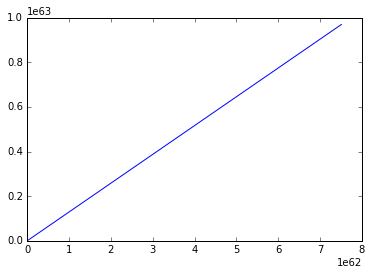

In [39]:
t,sol=RK4(ec_mov_1,[0,1,0,0],[0,12]) 
plot (sol[:,0],sol[:,1])
show()